In [ ]:
#install sentence_transformers
#pip install sentence_transformers

In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sentence_transformers import SentenceTransformer
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt 
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier

In [2]:
#Read the data
disastertweets=pd.read_csv("../input/nlp-getting-started/train.csv")
disastertweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
#assign text data to a pandas series textvector
#assign disaster resutls to target (responds)
textvector=disastertweets["text"]
target=disastertweets["target"]
textvector.head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [4]:
#count cases, cases proportion, and total number in the data
print("Number of case is {}, the proportion of case is {}, and the total number is {}".format(np.sum(target),
      len(target),np.sum(target)/len(target)))

Number of case is 3271, the proportion of case is 7613, and the total number is 0.4296597924602653


In [5]:
#count how many words in each sentense
counts=textvector.apply(lambda x: len(x.split()))

The minimun number word in a sentense is 1 and the maximun number of words is 31


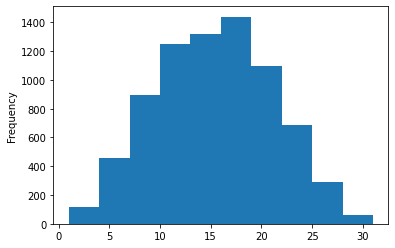

In [6]:
#histgram for counts
counts.plot.hist()
min_num=counts.min()
max_num=counts.max()
print("The minimun number word in a sentense is {} and the maximun number of words is {}".format(min_num,max_num))

In [7]:
#Use BoW model convert text to sparse feature matrix
count_vect = CountVectorizer()
x_train_counts= count_vect.fit_transform(textvector)
x_train_counts.shape

(7613, 21637)

In [9]:
#use BERT to convert text to feature matrix
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(textvector, show_progress_bar=True)

Batches:   0%|          | 0/238 [00:00<?, ?it/s]

In [10]:
x_train_embeddings=np.array(embeddings)
x_train_embeddings.shape

(7613, 768)

In [11]:
#Read the test data
disastertweets_test=pd.read_csv("../input/nlp-getting-started/test.csv")
disastertweets_test.head()
#convert test text to a test matrix
text_test = disastertweets_test["text"]
x_test_embeddings = model.encode(text_test, show_progress_bar=True)

Batches:   0%|          | 0/102 [00:00<?, ?it/s]

In [12]:
x_test_embeddings=np.array(x_test_embeddings)
x_test_embeddings.shape

(3263, 768)

In [13]:
x_test_counts= count_vect.transform(text_test)
x_test_counts.shape

(3263, 21637)

In [16]:
#train a logistic classifier for embeddings
Logistclf = LogisticRegression(penalty="l2", max_iter=1000).fit(x_train_embeddings, target)
#predict test data with logistic classifier
Logistpredict = Logistclf.predict(x_test_embeddings)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=Logistpredict
#write the reults
sample_submission.to_csv("./BERT_Logist.csv",index=False)
#results report
#Use BERT to convert features from text and use logistic classifier to classify target. 
#F1=2*precision*recall/(precision+recall)
#where precision=TP/(TP+FP)
#recall=TP/(TP+FN)
#True Positive [TP] = your prediction is 1, and the ground truth is also 1 - you predicted a positive and that's true!
#False Positive [FP] = your prediction is 1, and the ground truth is 0 - you predicted a positive, and that's false.
#False Negative [FN] = your prediction is 0, and the ground truth is 1 - you predicted a negative, and that's false.
#F1=0.8075

In [18]:
#train a logistic classifier for sparse feature matrix from bow
LogistclfBow = LogisticRegression(penalty="l2", max_iter=1000).fit(x_train_counts, target)
#predict test data with logistic classifier
LogistpredictBow = LogistclfBow.predict(x_test_counts)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=LogistpredictBow
#write the reults
sample_submission.to_csv("./Bow_Logist.csv",index=False)
#results report
#Use Bow to extract features from text and use logistic classifier to classify target. 
#F1=0.79987

In [19]:
#train a naive Bayes classifier for embeddings
NBclf = BernoulliNB().fit(x_train_embeddings, target)
#predict test data
NBpredict = NBclf.predict(x_test_embeddings)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=NBpredict
#write the reults
sample_submission.to_csv("./BERT_naiveBayes.csv",index=False)
#results report
#Use BERT to convert features from text and use naive Bayes classifier to classify target. 
#F1=0.7440

In [20]:
#train a naive Bayes classifier for sparse feature matrix from bow
NBclfBow = BernoulliNB().fit(x_train_counts, target)
#predict test data
NBpredictBow = NBclfBow.predict(x_test_counts)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=NBpredictBow
#write the reults
sample_submission.to_csv("./Bow_naiveBayes.csv",index=False)
#results report
#Use Bow to extract features matrix from text and use naive Bayes Bernoulli to classify target
#F1=0.79406

In [23]:
#train a support vector machine (SVM) classifier for embeddings
SVMclf = SGDClassifier(loss="log",penalty="l2",alpha=1e-3).fit(x_train_embeddings, target)
#predict test data with SVM classifier
SVMpredict = SVMclf.predict(x_test_embeddings)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=SVMpredict
#write the reults
sample_submission.to_csv("./BERT_SVM.csv",index=False)
#results report
#Use BERT to convert features from text and use SVM to classify target. 
#F1=0.81580

In [24]:
#train a support vector machine (SVM) classifier for sparse feature matrix from bow
SVMclfBow = SGDClassifier(loss="log",penalty="l2",alpha=1e-3).fit(x_train_counts, target)
#predict test data with SVM classifier
SVMpredictBow = SVMclfBow.predict(x_test_counts)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=SVMpredictBow
#write the reults
sample_submission.to_csv("./Bow_SVM.csv",index=False)
#results report
#Use Bow to extract features from text and use SVM to classify target. 
#F1=0.79773

In [26]:
#train a xgboost classifier for embeddings
xgbr = xgb.XGBClassifier(max_depth=3,eta=0.6,objective='binary:logistic',reg_lambda=2)
xgbr.fit(x_train_embeddings, target)
score = xgbr.score(x_train_embeddings, target)  
print("Training score: ", score)
xgbpredict = xgbr.predict(x_test_embeddings)
xgbpredict[0:10]
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=xgbpredict
#write the reults
sample_submission.to_csv("./BERT_xgboost.csv",index=False)
#results report
#Use BERT to convert features from text and use xgboost to classify target. 
#parameter setting:(max_depth=6,eta=0.6,objective='binary:logistic',reg_lambda=2)
#Training score:  0.9722842506239328
#Test F1=0.81581

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:48:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training score:  0.9722842506239328


In [27]:
#train a xgboost classifier for for sparse feature matrix from bow
xgbrBow = xgb.XGBClassifier(max_depth=5,eta=0.6,objective='binary:logistic',reg_lambda=2)
xgbrBow.fit(x_train_counts, target)
scoreBow = xgbrBow.score(x_train_counts, target)  
print("Training score: ", scoreBow)
xgbpredictBow = xgbrBow.predict(x_test_counts)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=xgbpredictBow
#write the reults
sample_submission.to_csv("./Bow_xgboost.csv",index=False)
#results report
#Use Bow to extract features from text and use xgboost to classify target. 
#parameter setting:(max_depth=5,eta=0.6,objective='binary:logistic',reg_lambda=2)
#Training score:  0.865493235255484
#Test F1=0.78577

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:53:15] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training score:  0.865493235255484


In [29]:
#randomforest model for embeddings
clf = RandomForestClassifier()
clf.fit(x_train_embeddings, target)
#predict test data
rf_predict = clf.predict(x_test_embeddings)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=rf_predict
#write the reults
sample_submission.to_csv("./BERT_forest.csv",index=False)
#results report
#Use BERT to convert features from text and use random.forest to classify target. 
#Test F1=0.81366

In [30]:
#randomforest model for embeddings
clfBow = RandomForestClassifier()
clfBow.fit(x_train_counts, target)
#predict test data
rf_predictBow = clfBow.predict(x_test_counts)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=rf_predictBow
#write the reults
sample_submission.to_csv("./Bow_forest.csv",index=False)
#results report
#Use Bow to convert features from text and use random.forest to classify target. 
#Test F1=0.78823

In [ ]:
#neural network from sklearn for embeddings
clf = MLPClassifier(solver='lbfgs', alpha=1e-3, random_state=1,max_iter=2000)
clf.fit(x_train_embeddings, target)
sklearn_nn_predict=clf.predict(x_test_embeddings)
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=sklearn_nn_predict
#write the reults
sample_submission.to_csv("./BERT_sklearn_nn.csv",index=False)
#results report
#Use BERT to convert features from text and use neural network from sklearn to classify target. 
#Test F1=77566

In [31]:
#define class for dataset, neural netword model, and train function
class traindata(Dataset):
    def __init__(self, X, y):
        if not torch.is_tensor(X) and not torch.is_tensor(y):
            self.X = torch.from_numpy(X)
            self.y = torch.Tensor(y)
        else:
            self.X = X
            self.y = y
        self.y = self.y.view(-1,1)
    def __getitem__(self, i):
        return self.X[i,], self.y[i]
    def __len__(self):
        return len(self.y)
    
class DisasterNN(nn.Module):
    def __init__(self,D_in,H,D_out):
        super().__init__()
        self.linear1=nn.Linear(D_in,H)
        self.linear2=nn.Linear(H,D_out)
    
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))
        x=torch.sigmoid(self.linear2(x))
        return x

def trainNN(trainset,modelNN,criterion,optimizer, epochs=50):
    cost=[]
    
    for epoch in range(epochs):
        total=0
        
        for X,y in trainloader:
            optimizer.zero_grad()
            yhat=modelNN(X)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
        
        cost.append(total)
    return cost  

In [ ]:
#neural network from pytorch for embeddings
modelNN=DisasterNN(x_train_embeddings.shape[1],4,1)
criterion=nn.BCELoss()
optimizer=torch.optim.SGD(modelNN.parameters(),lr=0.1)
trainset=traindata(x_train_embeddings,np.array(target))
trainloader=DataLoader(dataset=trainset,batch_size=10)
#plot cost and print train score
COST=trainNN(trainset,modelNN,criterion,optimizer,epochs=2000)
plt.plot(COST)
print(sum((modelNN(torch.tensor(x_train_embeddings))>0.5).int().view(-1).numpy()==target)/len(target))
nnpredict=(modelNN(torch.tensor(x_test_embeddings))>0.5).int().view(-1).numpy()
#Read the sample_submission
sample_submission=pd.read_csv("../input/nlp-getting-started/sample_submission.csv")
sample_submission["target"]=nnpredict
#write the reults
sample_submission.to_csv("./BERT_nn.csv",index=False)
#results report
#Use BERT to convert features from text and use neural network to classify target. 
#Test F1=0.788